# Randomization
A common trait to all the maze generation algorithms is randomization. To try and eradicate any bias that mazes might have we try and make them as random as possible. To generate random numbers we used the random library in python under the belief that it is truly random. But how random are the numbers generated by this 'random' function?

In [23]:
# Random functions and visualizer tool 
import random
import matplotlib.pyplot as plt

In [61]:
# Here we just create 10000 random numbers, and plot a distribution
# The seed for random is omitted to use the system time

# X is used to plot our distribution
x = list(range(0, 10000))

# Y stores the number of times each number is generated
y = [0]*10000

# Generate the random numbers and store them in the list
for i in range(0, 100000):
    y[random.randint(0, 9999)] += 1

for i in range(0, 10000):
    y[i] /= 100000

# Get mean and variance
temp = []
for i in range(0, 10000):
    temp.append(x[i]*y[i])

mean = sum(temp)

for i in range(0, 10000):
    temp[i] *= x[i]
variance = sum(temp) - mean**2

Mean     :  4986.167400000006
Variance :  8324701.388037238


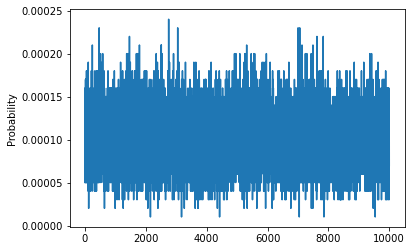

In [62]:
plt.plot(x, y)
plt.ylabel("Probability")

print("Mean     : ", mean)
print("Variance : ", variance)

## What does the above figure mean?
As we can see, the distribution is not very even. There exists some bias in the random numbers generated, and the distribution obtained is not really uniform. Although the mean value is pretty close to our expected mean, the variance is huge implying a large spread in the data. If it is difficult to see the differences in this image, lets take a look at only the first 10 numbers.

Mean     :  4.5112
Variance :  8.229214560000003


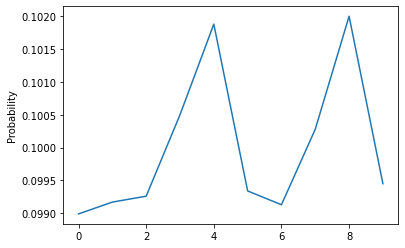

In [65]:
x = list(range(0, 10))
y = [0]*10

# Generate the random numbers and store them in the list
for i in range(0, 100000):
    y[random.randint(0, 9)] += 1

for i in range(0, 10):
    y[i] /= 100000

# Get mean and variance
temp = []
for i in range(0, 10):
    temp.append(x[i]*y[i])

mean = sum(temp)

for i in range(0, 10):
    temp[i] *= x[i]
variance = sum(temp) - mean**2

plt.plot(x, y)
plt.ylabel("Probability")
print("Mean     : ", mean)
print("Variance : ", variance)

As we can see, the distribution of the numbers obtained is not uniform even for a small range, and hence there is a very strong bias. The distribution is not even near uniform, as the variance is a large number, even though the mean is close to what we would expect it to be. If the random number generation in python isn't really random, how do we generate truly random numbers? First let us see how random numbers are generated in python.

## The Mersenne Twister
The mersenne twister is the most widely used pseudo-random number generator. It generates numbers based on numbers known as '<b>mersenne primes</b>'. A mersenne prime is a number that is prime, and is also 1 less than a power of 2. The smallest mersenne prime is 3, and the mersenne number used in python is 2<sup>19937</sup>−1. 